<a href="https://colab.research.google.com/github/iamkunalaggarwal/450_solutions/blob/main/cnn_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf

In [3]:
train = pd.read_csv('drive/MyDrive/fashion dataset/fashion-mnist_train.csv')
test = pd.read_csv('drive/MyDrive/fashion dataset/fashion-mnist_test.csv')
df = train.copy()
test_df = test.copy()
print("Data imported")

Data imported


In [4]:
#initial values of data set
print("Dataset Head")
print(train.head())
print("=" * 30)

Dataset Head
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      2       0       0       0  ...         0         0         0         0
1      9       0       0       0  ...         0         0         0         0
2      6       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [5]:
print(train.info())
print("=" * 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


In [6]:
print('Train: ', df.shape)
print('Test: ', test_df.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [7]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [8]:
 #Checking for Null Values in train 
df.isnull().any().sum()

0

In [9]:
 #Checking for Null Values in test
test_df.isnull().any().sum()

0

In [10]:
# Mapping Classes lebels
clothes = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

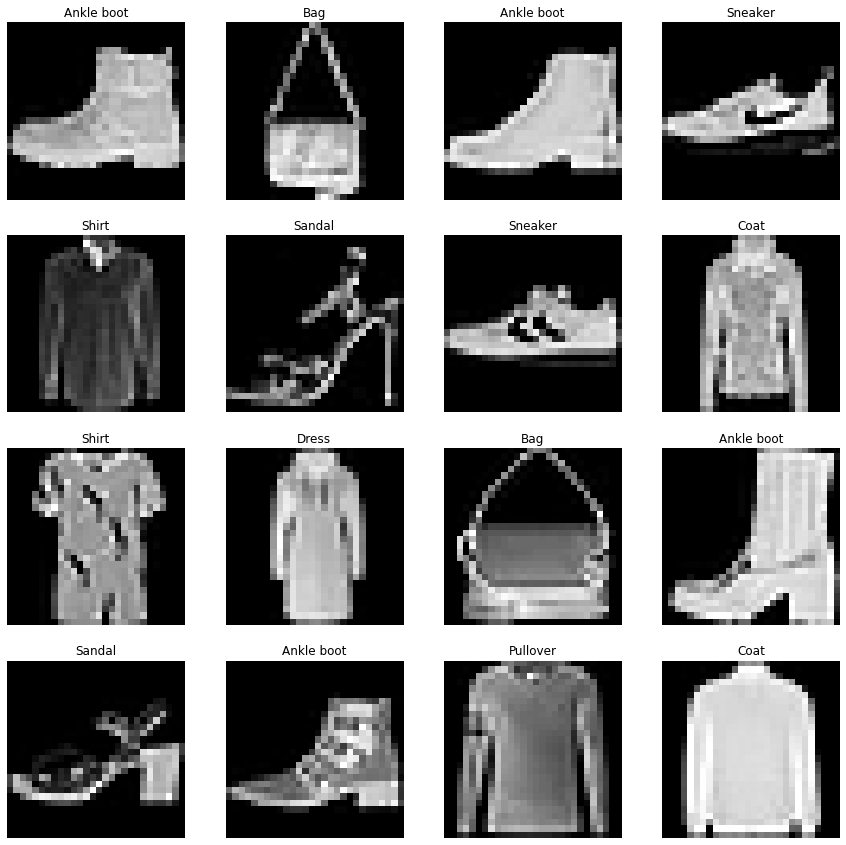

In [11]:
#Plotting Random Images
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothes[cloths])
        axe.set_axis_off()

In [12]:
df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


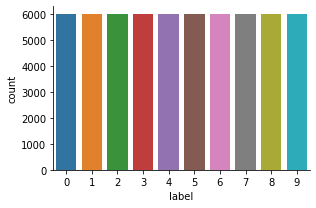

In [13]:
sns.factorplot(x='label', data=df, kind='count', size=3, aspect= 1.5)

In [14]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

In [15]:
from sklearn.model_selection import train_test_split
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 12345)

In [16]:
x_train.shape

(48000, 784)

In [17]:
x_validate.shape

(12000, 784)

In [18]:
# * unpack the tuple
x_train = x_train.values.reshape(x_train.shape[0], *(28, 28, 1))
x_validate = x_validate.values.reshape(x_validate.shape[0], *(28, 28, 1))

In [19]:
print(x_train.shape)
print(x_validate.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

In [22]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [23]:
epochs = 150

history = model.fit(x_train, y_train, batch_size = 512, epochs = epochs,
                        verbose = 1, validation_data = (x_validate, y_validate))

Epoch 1/150
94/94 [==============================] - 16s 56ms/step - loss: 4.6680 - accuracy: 0.4565 - val_loss: 0.8336 - val_accuracy: 0.6809
Epoch 2/150
94/94 [==============================] - 5s 51ms/step - loss: 0.9549 - accuracy: 0.6473 - val_loss: 0.6066 - val_accuracy: 0.7548
Epoch 3/150
94/94 [==============================] - 5s 49ms/step - loss: 0.7916 - accuracy: 0.6999 - val_loss: 0.5531 - val_accuracy: 0.7811
Epoch 4/150
94/94 [==============================] - 5s 49ms/step - loss: 0.7086 - accuracy: 0.7271 - val_loss: 0.5112 - val_accuracy: 0.7928
Epoch 5/150
94/94 [==============================] - 5s 51ms/step - loss: 0.6549 - accuracy: 0.7464 - val_loss: 0.4778 - val_accuracy: 0.8055
Epoch 6/150
94/94 [==============================] - 5s 49ms/step - loss: 0.6190 - accuracy: 0.7606 - val_loss: 0.4557 - val_accuracy: 0.8185
Epoch 7/150
94/94 [==============================] - 5s 49ms/step - loss: 0.5858 - accuracy: 0.7762 - val_loss: 0.4377 - val_accuracy: 0.8413
Epoch

Text(0.5, 1.0, 'Loss evolution')

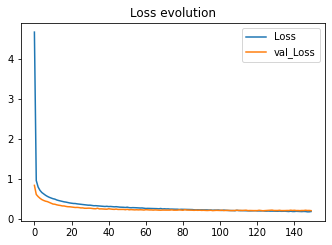

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

In [30]:
x_test = test.iloc[:,1:]
y_test = test_df.iloc[:,0]
x_test = x_test.values.reshape(x_test.shape[0], *(28, 28, 1))

In [31]:
evaluation = model.evaluate(x_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1969 - accuracy: 0.9324
Test Accuracy : 0.932
